## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

         X8        X9       X10       X11       X12       X13         Y  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503  


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.033215
0:	learn: 0.9781897	total: 57.5ms	remaining: 57.5s
1:	learn: 0.9604554	total: 58.3ms	remaining: 29.1s
2:	learn: 0.9412432	total: 59.1ms	remaining: 19.6s
3:	learn: 0.9251199	total: 59.8ms	remaining: 14.9s
4:	learn: 0.9075795	total: 60.5ms	remaining: 12s
5:	learn: 0.8906865	total: 61.5ms	remaining: 10.2s
6:	learn: 0.8737897	total: 62.4ms	remaining: 8.86s
7:	learn: 0.8567989	total: 63.4ms	remaining: 7.86s
8:	learn: 0.8421993	total: 64.2ms	remaining: 7.07s
9:	learn: 0.8257008	total: 65ms	remaining: 6.43s
10:	learn: 0.8135614	total: 65.7ms	remaining: 5.91s
11:	learn: 0.7986512	total: 66.9ms	remaining: 5.51s
12:	learn: 0.7840082	total: 67.9ms	remaining: 5.16s
13:	learn: 0.7698162	total: 68.7ms	remaining: 4.84s
14:	learn: 0.7580993	total: 69.4ms	remaining: 4.56s
15:	learn: 0.7452755	total: 70.2ms	remaining: 4.31s
16:	learn: 0.7324809	total: 70.9ms	remaining: 4.1s
17:	learn: 0.7199423	total: 71.6ms	remaining: 3.91s
18:	learn: 0.7078477	total: 72.4ms	remaining: 3.7

43:	learn: 0.4985362	total: 91.5ms	remaining: 1.99s
44:	learn: 0.4926931	total: 92.4ms	remaining: 1.96s
45:	learn: 0.4860050	total: 93.1ms	remaining: 1.93s
46:	learn: 0.4797052	total: 93.8ms	remaining: 1.9s
47:	learn: 0.4740516	total: 94.6ms	remaining: 1.88s
48:	learn: 0.4684348	total: 95.3ms	remaining: 1.85s
49:	learn: 0.4635808	total: 96.2ms	remaining: 1.83s
50:	learn: 0.4586438	total: 97.2ms	remaining: 1.81s
51:	learn: 0.4543245	total: 98.1ms	remaining: 1.79s
52:	learn: 0.4498171	total: 98.9ms	remaining: 1.77s
53:	learn: 0.4464817	total: 99.5ms	remaining: 1.74s
54:	learn: 0.4412555	total: 100ms	remaining: 1.72s
55:	learn: 0.4373880	total: 101ms	remaining: 1.71s
56:	learn: 0.4334338	total: 103ms	remaining: 1.7s
57:	learn: 0.4292776	total: 104ms	remaining: 1.68s
58:	learn: 0.4256495	total: 105ms	remaining: 1.67s
59:	learn: 0.4209220	total: 105ms	remaining: 1.65s
60:	learn: 0.4170474	total: 106ms	remaining: 1.63s
61:	learn: 0.4124975	total: 107ms	remaining: 1.62s
62:	learn: 0.4099927	t

120:	learn: 0.2852372	total: 172ms	remaining: 1.25s
121:	learn: 0.2843297	total: 173ms	remaining: 1.24s
122:	learn: 0.2829300	total: 174ms	remaining: 1.24s
123:	learn: 0.2820846	total: 175ms	remaining: 1.24s
124:	learn: 0.2807138	total: 176ms	remaining: 1.23s
125:	learn: 0.2795089	total: 177ms	remaining: 1.23s
126:	learn: 0.2779883	total: 178ms	remaining: 1.22s
127:	learn: 0.2764523	total: 179ms	remaining: 1.22s
128:	learn: 0.2752359	total: 180ms	remaining: 1.21s
129:	learn: 0.2738338	total: 181ms	remaining: 1.21s
130:	learn: 0.2727042	total: 181ms	remaining: 1.2s
131:	learn: 0.2711780	total: 182ms	remaining: 1.2s
132:	learn: 0.2701997	total: 184ms	remaining: 1.2s
133:	learn: 0.2693035	total: 185ms	remaining: 1.19s
134:	learn: 0.2683579	total: 186ms	remaining: 1.19s
135:	learn: 0.2671368	total: 187ms	remaining: 1.19s
136:	learn: 0.2663686	total: 188ms	remaining: 1.19s
137:	learn: 0.2655496	total: 189ms	remaining: 1.18s
138:	learn: 0.2644559	total: 190ms	remaining: 1.18s
139:	learn: 0.2

163:	learn: 0.2440665	total: 243ms	remaining: 1.24s
164:	learn: 0.2434957	total: 244ms	remaining: 1.24s
165:	learn: 0.2426978	total: 246ms	remaining: 1.23s
166:	learn: 0.2420955	total: 247ms	remaining: 1.23s
167:	learn: 0.2410821	total: 248ms	remaining: 1.23s
168:	learn: 0.2405014	total: 249ms	remaining: 1.22s
169:	learn: 0.2398831	total: 250ms	remaining: 1.22s
170:	learn: 0.2393060	total: 250ms	remaining: 1.21s
171:	learn: 0.2387290	total: 251ms	remaining: 1.21s
172:	learn: 0.2381261	total: 252ms	remaining: 1.21s
173:	learn: 0.2371311	total: 253ms	remaining: 1.2s
174:	learn: 0.2363036	total: 254ms	remaining: 1.2s
175:	learn: 0.2355130	total: 255ms	remaining: 1.19s
176:	learn: 0.2348264	total: 256ms	remaining: 1.19s
177:	learn: 0.2341321	total: 256ms	remaining: 1.18s
178:	learn: 0.2335042	total: 257ms	remaining: 1.18s
179:	learn: 0.2329906	total: 258ms	remaining: 1.17s
180:	learn: 0.2320526	total: 259ms	remaining: 1.17s
181:	learn: 0.2313057	total: 259ms	remaining: 1.17s
182:	learn: 0.

232:	learn: 0.2011473	total: 311ms	remaining: 1.02s
233:	learn: 0.2006201	total: 312ms	remaining: 1.02s
234:	learn: 0.2003123	total: 313ms	remaining: 1.02s
235:	learn: 0.1997873	total: 315ms	remaining: 1.02s
236:	learn: 0.1994245	total: 316ms	remaining: 1.02s
237:	learn: 0.1988369	total: 317ms	remaining: 1.02s
238:	learn: 0.1985108	total: 319ms	remaining: 1.01s
239:	learn: 0.1979063	total: 321ms	remaining: 1.02s
240:	learn: 0.1971970	total: 322ms	remaining: 1.01s
241:	learn: 0.1964678	total: 323ms	remaining: 1.01s
242:	learn: 0.1961270	total: 324ms	remaining: 1.01s
243:	learn: 0.1956972	total: 326ms	remaining: 1.01s
244:	learn: 0.1952370	total: 327ms	remaining: 1.01s
245:	learn: 0.1945270	total: 327ms	remaining: 1s
246:	learn: 0.1940536	total: 328ms	remaining: 1s
247:	learn: 0.1937709	total: 329ms	remaining: 999ms
248:	learn: 0.1931207	total: 331ms	remaining: 998ms
249:	learn: 0.1925251	total: 332ms	remaining: 996ms
250:	learn: 0.1921692	total: 333ms	remaining: 994ms
251:	learn: 0.1919

319:	learn: 0.1656762	total: 414ms	remaining: 881ms
320:	learn: 0.1654667	total: 416ms	remaining: 879ms
321:	learn: 0.1651488	total: 417ms	remaining: 877ms
322:	learn: 0.1647270	total: 417ms	remaining: 875ms
323:	learn: 0.1643004	total: 419ms	remaining: 873ms
324:	learn: 0.1640320	total: 419ms	remaining: 871ms
325:	learn: 0.1637948	total: 421ms	remaining: 869ms
326:	learn: 0.1636764	total: 421ms	remaining: 867ms
327:	learn: 0.1635266	total: 422ms	remaining: 865ms
328:	learn: 0.1632155	total: 423ms	remaining: 863ms
329:	learn: 0.1626978	total: 424ms	remaining: 862ms
330:	learn: 0.1625362	total: 426ms	remaining: 860ms
331:	learn: 0.1622838	total: 427ms	remaining: 859ms
332:	learn: 0.1621562	total: 428ms	remaining: 857ms
333:	learn: 0.1619850	total: 429ms	remaining: 855ms
334:	learn: 0.1615912	total: 430ms	remaining: 854ms
335:	learn: 0.1612942	total: 431ms	remaining: 853ms
336:	learn: 0.1609882	total: 432ms	remaining: 851ms
337:	learn: 0.1607440	total: 433ms	remaining: 849ms
338:	learn: 

382:	learn: 0.1472255	total: 483ms	remaining: 778ms
383:	learn: 0.1470848	total: 484ms	remaining: 777ms
384:	learn: 0.1467018	total: 486ms	remaining: 776ms
385:	learn: 0.1462790	total: 486ms	remaining: 774ms
386:	learn: 0.1461648	total: 487ms	remaining: 772ms
387:	learn: 0.1459561	total: 488ms	remaining: 770ms
388:	learn: 0.1457835	total: 489ms	remaining: 768ms
389:	learn: 0.1456074	total: 490ms	remaining: 767ms
390:	learn: 0.1455443	total: 492ms	remaining: 766ms
391:	learn: 0.1452603	total: 494ms	remaining: 766ms
392:	learn: 0.1450707	total: 495ms	remaining: 765ms
393:	learn: 0.1447311	total: 496ms	remaining: 763ms
394:	learn: 0.1442850	total: 497ms	remaining: 761ms
395:	learn: 0.1440981	total: 497ms	remaining: 759ms
396:	learn: 0.1438598	total: 499ms	remaining: 757ms
397:	learn: 0.1436522	total: 499ms	remaining: 755ms
398:	learn: 0.1433607	total: 500ms	remaining: 754ms
399:	learn: 0.1430975	total: 502ms	remaining: 754ms
400:	learn: 0.1429199	total: 504ms	remaining: 752ms
401:	learn: 

477:	learn: 0.1226633	total: 590ms	remaining: 645ms
478:	learn: 0.1224166	total: 592ms	remaining: 644ms
479:	learn: 0.1222399	total: 593ms	remaining: 642ms
480:	learn: 0.1220266	total: 594ms	remaining: 641ms
481:	learn: 0.1217513	total: 595ms	remaining: 640ms
482:	learn: 0.1214643	total: 596ms	remaining: 638ms
483:	learn: 0.1211461	total: 597ms	remaining: 636ms
484:	learn: 0.1208617	total: 598ms	remaining: 635ms
485:	learn: 0.1206452	total: 599ms	remaining: 634ms
486:	learn: 0.1204374	total: 600ms	remaining: 632ms
487:	learn: 0.1202215	total: 601ms	remaining: 631ms
488:	learn: 0.1199026	total: 602ms	remaining: 629ms
489:	learn: 0.1197229	total: 603ms	remaining: 628ms
490:	learn: 0.1193793	total: 604ms	remaining: 626ms
491:	learn: 0.1192449	total: 605ms	remaining: 625ms
492:	learn: 0.1190775	total: 606ms	remaining: 624ms
493:	learn: 0.1189885	total: 608ms	remaining: 623ms
494:	learn: 0.1187590	total: 609ms	remaining: 621ms
495:	learn: 0.1184459	total: 610ms	remaining: 620ms
496:	learn: 

555:	learn: 0.1065034	total: 675ms	remaining: 539ms
556:	learn: 0.1062437	total: 677ms	remaining: 538ms
557:	learn: 0.1060817	total: 679ms	remaining: 537ms
558:	learn: 0.1059319	total: 680ms	remaining: 536ms
559:	learn: 0.1057529	total: 681ms	remaining: 535ms
560:	learn: 0.1055805	total: 681ms	remaining: 533ms
561:	learn: 0.1054782	total: 683ms	remaining: 532ms
562:	learn: 0.1053529	total: 684ms	remaining: 531ms
563:	learn: 0.1051692	total: 685ms	remaining: 529ms
564:	learn: 0.1049389	total: 686ms	remaining: 528ms
565:	learn: 0.1046939	total: 687ms	remaining: 527ms
566:	learn: 0.1044658	total: 688ms	remaining: 525ms
567:	learn: 0.1043844	total: 690ms	remaining: 525ms
568:	learn: 0.1040257	total: 691ms	remaining: 523ms
569:	learn: 0.1038093	total: 692ms	remaining: 522ms
570:	learn: 0.1036151	total: 693ms	remaining: 521ms
571:	learn: 0.1035110	total: 695ms	remaining: 520ms
572:	learn: 0.1033892	total: 696ms	remaining: 518ms
573:	learn: 0.1032031	total: 697ms	remaining: 517ms
574:	learn: 

649:	learn: 0.0916999	total: 782ms	remaining: 421ms
650:	learn: 0.0915007	total: 783ms	remaining: 420ms
651:	learn: 0.0913872	total: 784ms	remaining: 419ms
652:	learn: 0.0912309	total: 785ms	remaining: 417ms
653:	learn: 0.0910477	total: 786ms	remaining: 416ms
654:	learn: 0.0909199	total: 787ms	remaining: 415ms
655:	learn: 0.0907313	total: 789ms	remaining: 414ms
656:	learn: 0.0906234	total: 790ms	remaining: 412ms
657:	learn: 0.0904836	total: 791ms	remaining: 411ms
658:	learn: 0.0903085	total: 792ms	remaining: 410ms
659:	learn: 0.0902508	total: 793ms	remaining: 409ms
660:	learn: 0.0900782	total: 794ms	remaining: 407ms
661:	learn: 0.0898940	total: 795ms	remaining: 406ms
662:	learn: 0.0898603	total: 796ms	remaining: 405ms
663:	learn: 0.0897502	total: 798ms	remaining: 404ms
664:	learn: 0.0895752	total: 799ms	remaining: 402ms
665:	learn: 0.0894475	total: 800ms	remaining: 401ms
666:	learn: 0.0892928	total: 801ms	remaining: 400ms
667:	learn: 0.0891832	total: 802ms	remaining: 399ms
668:	learn: 

715:	learn: 0.0830164	total: 866ms	remaining: 344ms
716:	learn: 0.0829257	total: 868ms	remaining: 342ms
717:	learn: 0.0827464	total: 869ms	remaining: 341ms
718:	learn: 0.0826839	total: 869ms	remaining: 340ms
719:	learn: 0.0825603	total: 870ms	remaining: 338ms
720:	learn: 0.0824157	total: 871ms	remaining: 337ms
721:	learn: 0.0823092	total: 872ms	remaining: 336ms
722:	learn: 0.0821554	total: 874ms	remaining: 335ms
723:	learn: 0.0820138	total: 875ms	remaining: 334ms
724:	learn: 0.0818743	total: 876ms	remaining: 332ms
725:	learn: 0.0817476	total: 877ms	remaining: 331ms
726:	learn: 0.0816193	total: 878ms	remaining: 330ms
727:	learn: 0.0814070	total: 878ms	remaining: 328ms
728:	learn: 0.0813132	total: 879ms	remaining: 327ms
729:	learn: 0.0812260	total: 880ms	remaining: 326ms
730:	learn: 0.0811262	total: 881ms	remaining: 324ms
731:	learn: 0.0810605	total: 882ms	remaining: 323ms
732:	learn: 0.0809188	total: 883ms	remaining: 322ms
733:	learn: 0.0807657	total: 885ms	remaining: 321ms
734:	learn: 

819:	learn: 0.0717612	total: 974ms	remaining: 214ms
820:	learn: 0.0717567	total: 975ms	remaining: 213ms
821:	learn: 0.0716436	total: 976ms	remaining: 211ms
822:	learn: 0.0714909	total: 977ms	remaining: 210ms
823:	learn: 0.0714197	total: 977ms	remaining: 209ms
824:	learn: 0.0712912	total: 979ms	remaining: 208ms
825:	learn: 0.0712229	total: 979ms	remaining: 206ms
826:	learn: 0.0711844	total: 980ms	remaining: 205ms
827:	learn: 0.0710340	total: 981ms	remaining: 204ms
828:	learn: 0.0709548	total: 982ms	remaining: 203ms
829:	learn: 0.0708077	total: 983ms	remaining: 201ms
830:	learn: 0.0706131	total: 984ms	remaining: 200ms
831:	learn: 0.0705066	total: 984ms	remaining: 199ms
832:	learn: 0.0704184	total: 985ms	remaining: 197ms
833:	learn: 0.0702533	total: 986ms	remaining: 196ms
834:	learn: 0.0702441	total: 987ms	remaining: 195ms
835:	learn: 0.0701138	total: 987ms	remaining: 194ms
836:	learn: 0.0699830	total: 988ms	remaining: 192ms
837:	learn: 0.0698681	total: 989ms	remaining: 191ms
838:	learn: 

912:	learn: 0.0627924	total: 1.06s	remaining: 101ms
913:	learn: 0.0627025	total: 1.06s	remaining: 99.7ms
914:	learn: 0.0626184	total: 1.06s	remaining: 98.5ms
915:	learn: 0.0625214	total: 1.06s	remaining: 97.3ms
916:	learn: 0.0624202	total: 1.06s	remaining: 96.2ms
917:	learn: 0.0623312	total: 1.06s	remaining: 95ms
918:	learn: 0.0622438	total: 1.06s	remaining: 93.8ms
919:	learn: 0.0621235	total: 1.06s	remaining: 92.6ms
920:	learn: 0.0620070	total: 1.07s	remaining: 91.5ms
921:	learn: 0.0619174	total: 1.07s	remaining: 90.3ms
922:	learn: 0.0618193	total: 1.07s	remaining: 89.1ms
923:	learn: 0.0617248	total: 1.07s	remaining: 87.9ms
924:	learn: 0.0615933	total: 1.07s	remaining: 86.8ms
925:	learn: 0.0615500	total: 1.07s	remaining: 85.6ms
926:	learn: 0.0614334	total: 1.07s	remaining: 84.5ms
927:	learn: 0.0613411	total: 1.07s	remaining: 83.3ms
928:	learn: 0.0612513	total: 1.07s	remaining: 82.2ms
929:	learn: 0.0611464	total: 1.08s	remaining: 81ms
930:	learn: 0.0610870	total: 1.08s	remaining: 79.8m

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

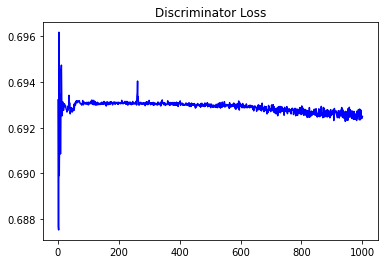

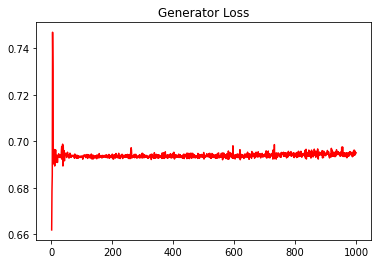

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.09879827919172993


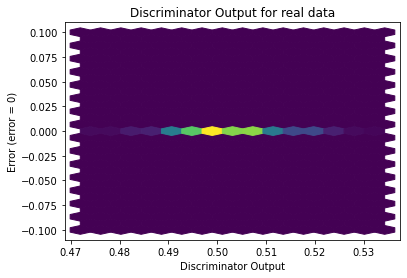

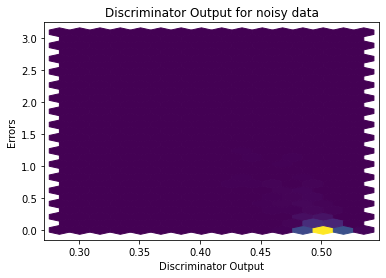

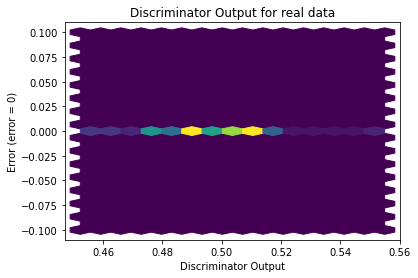

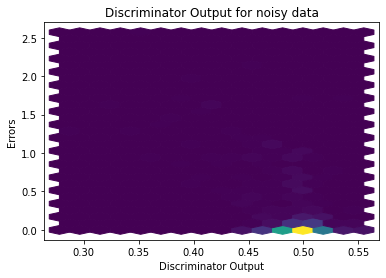

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


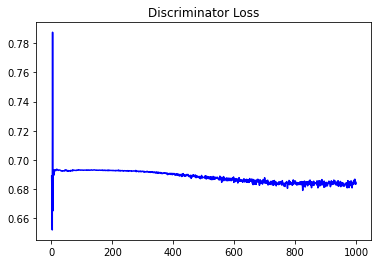

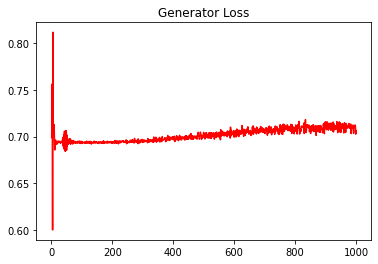

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.1114996940602828


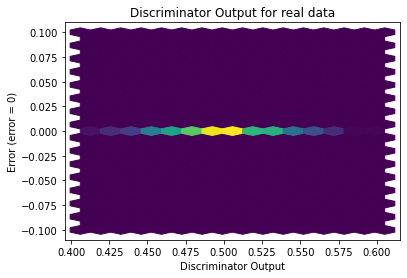

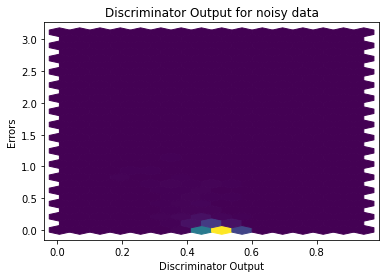

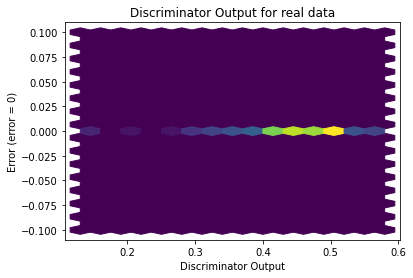

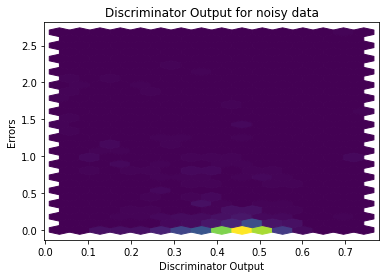

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1674]], requires_grad=True)
